C:\Users\rishi\AppData\Local\Temp\ipykernel_36564\4271658037.py:19: RuntimeWarning: invalid value encountered in scalar divide
  r = 1j * (k1**2 + k2**2) * np.sinh(k2 * L) / ((k1**2 - k2**2) * np.sinh(k2 * L) + 2j * k1 * k2 * np.cosh(k2 * L))
C:\Users\rishi\AppData\Local\Temp\ipykernel_36564\4271658037.py:20: RuntimeWarning: invalid value encountered in scalar divide
  t = 2j * k1 * k2 / ((k1**2 - k2**2) * np.sinh(k2 * L) + 2j * k1 * k2 * np.cosh(k2 * L))


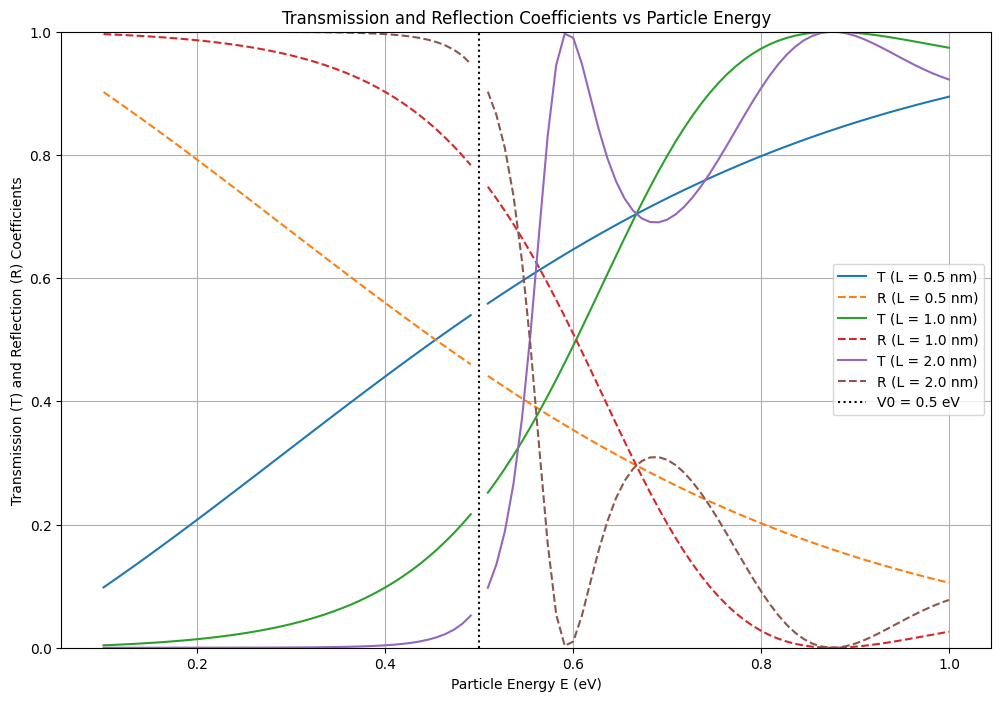

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import constants

# Constants
h_bar = constants.hbar  # Reduced Planck's constant
m = constants.electron_mass  # Electron mass
V0 = 0.5 * constants.electron_volt  # Barrier height (0.5 eV)

def calculate_coefficients(E, L):
    k1 = np.sqrt(2 * m * E) / h_bar
    if E > V0:
        k2 = np.sqrt(2 * m * (E - V0)) / h_bar
        r = 1j * (k1**2 - k2**2) * np.sin(k2 * L) / ((k1**2 + k2**2) * np.sin(k2 * L) + 2j * k1 * k2 * np.cos(k2 * L))
        t = 2j * k1 * k2 / ((k1**2 + k2**2) * np.sin(k2 * L) + 2j * k1 * k2 * np.cos(k2 * L))
    else:
        k2 = np.sqrt(2 * m * (V0 - E)) / h_bar
        r = 1j * (k1**2 + k2**2) * np.sinh(k2 * L) / ((k1**2 - k2**2) * np.sinh(k2 * L) + 2j * k1 * k2 * np.cosh(k2 * L))
        t = 2j * k1 * k2 / ((k1**2 - k2**2) * np.sinh(k2 * L) + 2j * k1 * k2 * np.cosh(k2 * L))
    
    T = np.abs(t)**2
    R = np.abs(r)**2
    return T, R

# Generate data
E_values = np.linspace(0.1, 1, 100) * constants.electron_volt
L_values = np.array([0.5e-9, 1e-9, 2e-9])  # Barrier widths in meters
# L_values = np.array([5e-9])

data = []
for L in L_values:
    for E in E_values:
        T, R = calculate_coefficients(E, L)
        data.append({
            'E (eV)': E / constants.electron_volt,
            'L (nm)': L * 1e9,
            'T': T,
            'R': R
        })

# Create DataFrame
df = pd.DataFrame(data)

# Plot
plt.figure(figsize=(12, 8))
for L in L_values:
    df_L = df[df['L (nm)'] == L * 1e9]
    plt.plot(df_L['E (eV)'], df_L['T'], label=f'T (L = {L*1e9:.1f} nm)')
    plt.plot(df_L['E (eV)'], df_L['R'], label=f'R (L = {L*1e9:.1f} nm)', linestyle='--')

plt.axvline(x=V0/constants.electron_volt, color='k', linestyle=':', label='V0 = 0.5 eV')
plt.xlabel('Particle Energy E (eV)')
plt.ylabel('Transmission (T) and Reflection (R) Coefficients')
plt.title('Transmission and Reflection Coefficients vs Particle Energy')
plt.legend()
plt.grid(True)
plt.ylim(0, 1)
plt.savefig('transmission_reflection_energy_chart.png', dpi=300, bbox_inches='tight')
plt.show()


In [2]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from scipy import constants

# Constants
h_bar = constants.hbar  # Reduced Planck's constant
m = constants.electron_mass  # Electron mass
V0 = 0.3 * constants.electron_volt  # Barrier height (0.3 eV)

def calculate_coefficients(E, L):
    k1 = np.sqrt(2 * m * E) / h_bar
    if E > V0:
        k2 = np.sqrt(2 * m * (E - V0)) / h_bar
        r = 1j * (k1**2 - k2**2) * np.sin(k2 * L) / ((k1**2 + k2**2) * np.sin(k2 * L) + 2j * k1 * k2 * np.cos(k2 * L))
        t = 2j * k1 * k2 / ((k1**2 + k2**2) * np.sin(k2 * L) + 2j * k1 * k2 * np.cos(k2 * L))
    else:
        k2 = np.sqrt(2 * m * (V0 - E)) / h_bar
        r = 1j * (k1**2 + k2**2) * np.sinh(k2 * L) / ((k1**2 - k2**2) * np.sinh(k2 * L) + 2j * k1 * k2 * np.cosh(k2 * L))
        t = 2j * k1 * k2 / ((k1**2 - k2**2) * np.sinh(k2 * L) + 2j * k1 * k2 * np.cosh(k2 * L))
    
    T = np.abs(t)**2
    R = np.abs(r)**2
    return T, R

# Generate data
E_values = np.linspace(0.1, 1, 50) * constants.electron_volt
L_values = np.linspace(1e-9, 5e-9, 50)  # Barrier widths from 0.5 to 5 nm

E_mesh, L_mesh = np.meshgrid(E_values, L_values)
T_values = np.zeros_like(E_mesh)
R_values = np.zeros_like(E_mesh)

for i in range(E_mesh.shape[0]):
    for j in range(E_mesh.shape[1]):
        T_values[i, j], R_values[i, j] = calculate_coefficients(E_mesh[i, j], L_mesh[i, j])

# Create 3D plot using Plotly
fig = go.Figure()

# Transmission surface
fig.add_surface(x=E_mesh / constants.electron_volt, 
                y=L_mesh * 1e9, 
                z=T_values, 
                colorscale='Viridis',
                name='Transmission',
                showscale=False)

# Reflection surface
fig.add_surface(x=E_mesh / constants.electron_volt, 
                y=L_mesh * 1e9, 
                z=R_values, 
                colorscale='Plasma',
                name='Reflection',
                showscale=False)

fig.update_layout(
    title='Transmission and Reflection Coefficients',
    scene=dict(
        xaxis_title='Energy (eV)',
        yaxis_title='Barrier Width (nm)',
        zaxis_title='Coefficient',
        xaxis=dict(range=[0.1, 1]),
        yaxis=dict(range=[0.5, 5]),
        zaxis=dict(range=[0, 1])
    ),
    width=800,
    height=800,
    autosize=False
)

# Add a plane at z=1 to show where T+R=1
z_plane = np.ones_like(E_mesh)
fig.add_surface(x=E_mesh / constants.electron_volt, 
                y=L_mesh * 1e9, 
                z=z_plane, 
                colorscale=[[0, 'rgba(200,200,200,0.3)'], [1, 'rgba(200,200,200,0.3)']],
                showscale=False,
                name='T+R=1 Plane')

fig.show()

# Save the figure as an HTML file
fig.write_html("transmission_reflection_3d_plotly.html")

# Print example values
print("Example values:")
print(f"E = 0.3 eV, L = 1 nm:")
T, R = calculate_coefficients(0.3 * constants.electron_volt, 1e-9)
print(f"Transmission: {T:.4f}, Reflection: {R:.4f}")
print(f"\nE = 0.7 eV, L = 1 nm:")
T, R = calculate_coefficients(0.7 * constants.electron_volt, 1e-9)
print(f"Transmission: {T:.4f}, Reflection: {R:.4f}")

Example values:
E = 0.3 eV, L = 1 nm:
Transmission: nan, Reflection: nan

E = 0.7 eV, L = 1 nm:
Transmission: 0.9992, Reflection: 0.0008


C:\Users\rishi\AppData\Local\Temp\ipykernel_36564\983691366.py:19: RuntimeWarning:

invalid value encountered in scalar divide

C:\Users\rishi\AppData\Local\Temp\ipykernel_36564\983691366.py:20: RuntimeWarning:

invalid value encountered in scalar divide



In [ ]:
import numpy as np
import cupy as cp
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib import animation
from matplotlib.collections import PolyCollection
from tqdm import tqdm
from scipy import constants

# --- Physical constants ---
hbar = 1.054571817e-34  # Reduced Planck's constant (J·s)
m_e = 9.10938356e-31    # Electron mass (kg)
eV  = 1.602176634e-19   # Electron volt in Joules

def potential(x, V0, L, x0):
    return V0 * (cp.heaviside(x - x0, 0.5) - cp.heaviside(x - (x0 + L), 0.5))

def create_hamiltonian(x, V, dx):
    N = len(x)
    H = cp.zeros((N, N))
    for i in range(N):
        H[i, i] = -2
        if i > 0:
            H[i, i-1] = 1
        if i < N-1:
            H[i, i+1] = 1
    H *= -hbar**2 / (2*m_e*dx**2)
    H += cp.diag(V)
    return H

def pade_expm(A):
    """Matrix exponential via Pade approximation."""
    n_A = cp.linalg.norm(A, ord=1)
    exp_A = cp.eye(A.shape[0], dtype=A.dtype)
    if n_A < 1e-8:
        return exp_A
    s = max(0, int(cp.ceil(cp.log2(n_A))))
    A = A / (2**s)
    X = A
    c = 0.5
    exp_A += c * A
    D = cp.eye(A.shape[0], dtype=A.dtype) - c * A
    for k in range(2, 7):
        c = c * (6 - k) / ((2*6 - k)*k)
        X = A @ X
        cX = c * X
        exp_A += cX
        D -= cX
    exp_A = cp.linalg.solve(D, exp_A)
    for _ in range(s):
        exp_A = exp_A @ exp_A
    return exp_A

def time_evolution(psi_0, H, t):
    U = pade_expm(-1j * H * t / hbar)
    return U @ psi_0

def calculate_coefficients(E, V0, L):
    """Plane-wave T,R for a barrier of height V0, width L, at energy E."""
    h_bar = constants.hbar
    m = constants.electron_mass
    k1 = np.sqrt(2 * m * E) / h_bar
    if E > V0:
        k2 = np.sqrt(2 * m * (E - V0)) / h_bar
        r = 1j * (k1**2 - k2**2)*np.sin(k2*L) / (
            (k1**2 + k2**2)*np.sin(k2*L) + 2j*k1*k2*np.cos(k2*L)
        )
        t = 2j * k1*k2 / (
            (k1**2 + k2**2)*np.sin(k2*L) + 2j*k1*k2*np.cos(k2*L)
        )
    else:
        k2 = np.sqrt(2 * m * (V0 - E)) / h_bar
        r = 1j * (k1**2 + k2**2)*np.sinh(k2*L) / (
            (k1**2 - k2**2)*np.sinh(k2*L) + 2j*k1*k2*np.cosh(k2*L)
        )
        t = 2j * k1*k2 / (
            (k1**2 - k2**2)*np.sinh(k2*L) + 2j*k1*k2*np.cosh(k2*L)
        )
    T = np.abs(t)**2
    R = np.abs(r)**2
    return T, R

class QuantumTunnelingSimulator:
    def __init__(self, E, V0, L, N, initial_position,sigma = 2e-9):
        # Convert to SI
        self.E = E * eV
        self.V0 = V0 * eV
        self.L = L * 1e-9
        self.N = N
        self.x = cp.linspace(-20e-9, 20e-9, N)  # in meters
        self.dx = self.x[1] - self.x[0]
        
        # Potential
        self.V = potential(self.x, self.V0, self.L, 0.0)
        self.H = create_hamiltonian(self.x, self.V, self.dx)
        
        # Wave packet
        self.x_0 = initial_position * 1e-9
        print(sigma)
        self.sigma = sigma
        self.k0 = cp.sqrt(2*m_e*self.E)/hbar
        self.psi_0 = self.create_wave_packet(self.x_0)
        self.psi = self.psi_0.copy()
        
        # Absorbing boundaries
        self.absorbing_potential = self.create_absorbing_potential()
        self.H += cp.diag(self.absorbing_potential)
        
        # Static T,R
        self.T, self.R = calculate_coefficients(self.E, self.V0, self.L)
        print(f"Static coefficients: T = {self.T:.4f}, R = {self.R:.4f}")

    def create_wave_packet(self, x0):
        psi = cp.exp(-((self.x - x0)**2)/(4*self.sigma**2) + 1j*self.k0*(self.x - x0))
        norm = cp.sqrt(cp.sum(cp.abs(psi)**2)*self.dx)
        return psi/norm
    
    def create_absorbing_potential(self):
        width = 1e-9
        strength = 15*eV
        left = cp.exp(-((self.x + cp.abs(self.x[0]))**2)/width**2)*strength
        right = cp.exp(-((self.x - cp.abs(self.x[-1]))**2)/width**2)*strength
        return left + right
    
    def update(self, t):
        self.psi = time_evolution(self.psi, self.H, t)
        return self.psi

def create_phase_fill_verts(x, y, phase):
    """
    Given arrays x, y, and phase (same length),
    build the vertices for a PolyCollection that
    fills from y=0 up to y[i], colored by local phase.

    Returns:
      verts  : list of polygons
      colors : array of phase values (one per polygon)
    """
    verts = []
    colors = []
    for i in range(len(x) - 1):
        # Build a trapezoid from x[i] to x[i+1]
        #  top left:    (x[i],   y[i])
        #  bottom left: (x[i],   0)
        #  bottom right:(x[i+1], 0)
        #  top right:   (x[i+1], y[i+1])
        poly = [
            (x[i],   0),
            (x[i],   y[i]),
            (x[i+1], y[i+1]),
            (x[i+1], 0)
        ]
        verts.append(poly)
        
        # We'll assign the "average" phase for the color
        avg_phase = 0.5*(phase[i] + phase[i+1])
        colors.append(avg_phase)
    return verts, np.array(colors)

def create_quantum_tunneling_video(E, V0, L, N, num_frames, fps, initial_position,sigma=2e-9):
    sim = QuantumTunnelingSimulator(E, V0, L, N, initial_position,sigma = sigma)
    
    fig, ax = plt.subplots(figsize=(12,6))
    x_vals = cp.asnumpy(sim.x)*1e9  # in nm
    
    # Lines: Probability density, Real, Imag, Potential
    (line_psi,)  = ax.plot([], [], 'b', label='|ψ|²', zorder=3)
    (line_real,) = ax.plot([], [], 'g', label='Re(ψ)', zorder=3)
    (line_imag,) = ax.plot([], [], 'r', label='Im(ψ)', zorder=3)
    ax.plot(x_vals, cp.asnumpy(sim.V)/eV, 'k--', label='Potential', zorder=2)
    ax.axhline(y=E, color='m', linestyle=':', label='Energy', zorder=2)
    
    ax.set_xlim(x_vals.min(), x_vals.max())
    ax.set_ylim(-0.5, max(V0, E, 1)*1.1)
    ax.set_xlabel('Position (nm)')
    ax.set_ylabel('Energy (eV) / Wavefunction')
    ax.legend()
    
    # Parameter annotation
    info_str = f'E = {E} eV\nV₀ = {V0} eV\nL = {L} nm \n Λ ={sigma}'
    ax.text(0.02, 0.95, info_str, transform=ax.transAxes, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    # Precompute scaling factors
    max_amplitude = cp.max(cp.abs(sim.psi_0)**2)
    scale_factor  = V0 / max_amplitude  # for |ψ|²
    # For real/imag, we often use sqrt(scale_factor)
    
    # --- Create a single PolyCollection for the phase fill ---
    init_y = np.zeros_like(x_vals)
    init_p = np.zeros_like(x_vals)
    verts, color_array = create_phase_fill_verts(x_vals, init_y, init_p)
    
    phase_fill = PolyCollection(verts, array=color_array, cmap='hsv',
                                edgecolors='none', zorder=1, alpha=0.8)
    phase_fill.set_clim(-np.pi, np.pi)  # Phase range in radians
    ax.add_collection(phase_fill)
    
    # Add a colorbar for phase
    cbar = plt.colorbar(phase_fill, ax=ax, orientation='vertical', pad=0.02)
    cbar.set_label('Phase (rad)')
    
    def init():
        return line_psi, line_real, line_imag, phase_fill
    
    def update(frame):
        t = frame * 5e-17  # e.g., 1 fs per frame 
        psi = sim.update(t)
        
        # Probability density
        psi_abs2 = cp.abs(psi)**2
        scaled_psi_squared = psi_abs2 * scale_factor
        
        # Real, Imag
        psi_r = psi.real * cp.sqrt(scale_factor)
        psi_i = psi.imag * cp.sqrt(scale_factor)
        
        # Update line data
        line_psi.set_data(x_vals, cp.asnumpy(scaled_psi_squared))
        line_real.set_data(x_vals, cp.asnumpy(psi_r))
        line_imag.set_data(x_vals, cp.asnumpy(psi_i))
        
        # Update title
        ax.set_title(f'Quantum Tunneling (t = {t*1e15:.2f} fs, '
                     f'T = {sim.T:.4f}, R = {sim.R:.4f})')
        
        # Update the phase fill under the real part
        real_part = cp.asnumpy(scaled_psi_squared)
        phase     = cp.asnumpy(cp.angle(psi))  # in [-π, π]
        
        new_verts, new_colors = create_phase_fill_verts(x_vals, real_part, phase)
        phase_fill.set_verts(new_verts)
        phase_fill.set_array(new_colors)
        
        return line_psi, line_real, line_imag, phase_fill
    
    anim = FuncAnimation(fig, update, frames=num_frames, init_func=init,
                         interval=1000/fps, blit=False)
    
    writer = animation.FFMpegWriter(fps=fps, metadata=dict(artist='Me'), bitrate=1800)
    
    with tqdm(total=num_frames, desc="Creating video") as pbar:
        anim.save('quantum_tunneling.mp4', writer=writer,
                  progress_callback=lambda i, n: pbar.update(1))
    
    plt.close(fig)

# -----------------------------
# Example usage
# -----------------------------
E = 0.3       # Energy (eV)
V0 = 0.3434   # Barrier height (eV)
L = 1.0       # Barrier width (nm)
N = 3000
num_frames = 60
fps = 10
initial_position = -5  # nm
wave_width = 1e-9 #sigma
create_quantum_tunneling_video(E, V0, L, N, num_frames, fps, initial_position, sigma = wave_width)
print("Video creation complete. The file 'quantum_tunneling.mp4' has been saved.")



Static coefficients: T = 0.2119, R = 0.7881


Creating video: 100%|██████████| 60/60 [12:50<00:00, 12.84s/it]

Video creation complete. The file 'quantum_tunneling.mp4' has been saved.


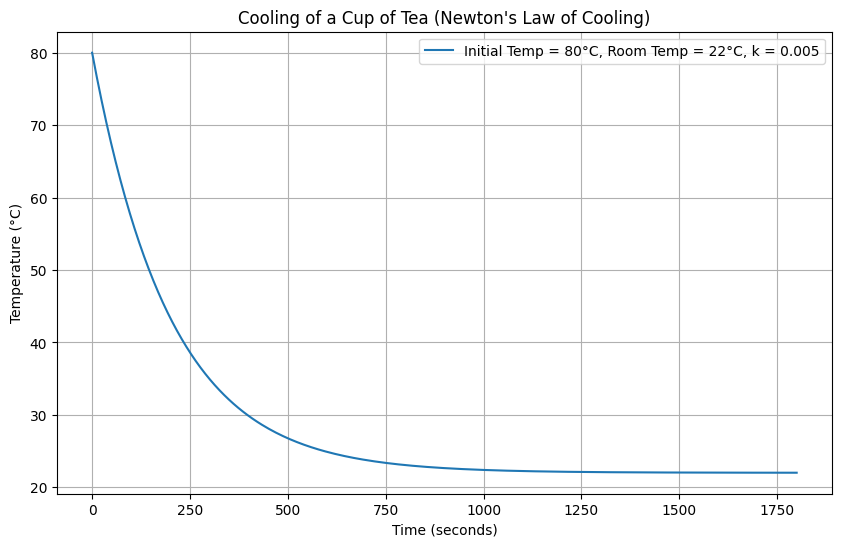

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def newtons_law_of_cooling(t, T0, Ta, k):
    """
    Calculates the temperature of the tea at time t.
    """
    return Ta + (T0 - Ta) * np.exp(-k * t)

# Parameters for our tea example
T0 = 80  # Initial tea temperature (degrees Celsius)
Ta = 22  # Ambient room temperature (degrees Celsius)
k = 0.005  # Cooling constant (1/seconds) -  estimated value
time = np.linspace(0, 1800, 300)  # Time from 0 to 1800 seconds (30 minutes), 300 points

# Calculate the tea's temperature over time
temperature = newtons_law_of_cooling(time, T0, Ta, k)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(time, temperature, label=f'Initial Temp = {T0}°C, Room Temp = {Ta}°C, k = {k}')
plt.xlabel('Time (seconds)')
plt.ylabel('Temperature (°C)')
plt.title("Cooling of a Cup of Tea (Newton's Law of Cooling)")
plt.grid(True)
plt.legend()
plt.show()